In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
df.shape

(30, 2)

In [5]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
plt.rcParams['figure.figsize']=(6,3)
plt.rcParams['figure.dpi']=200

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

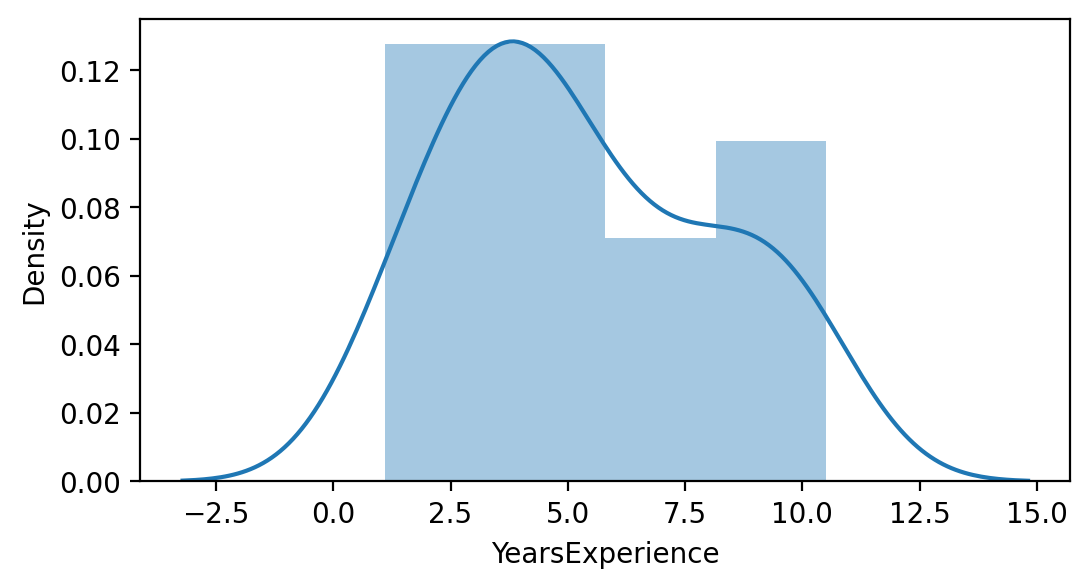

In [9]:
sns.distplot(df['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

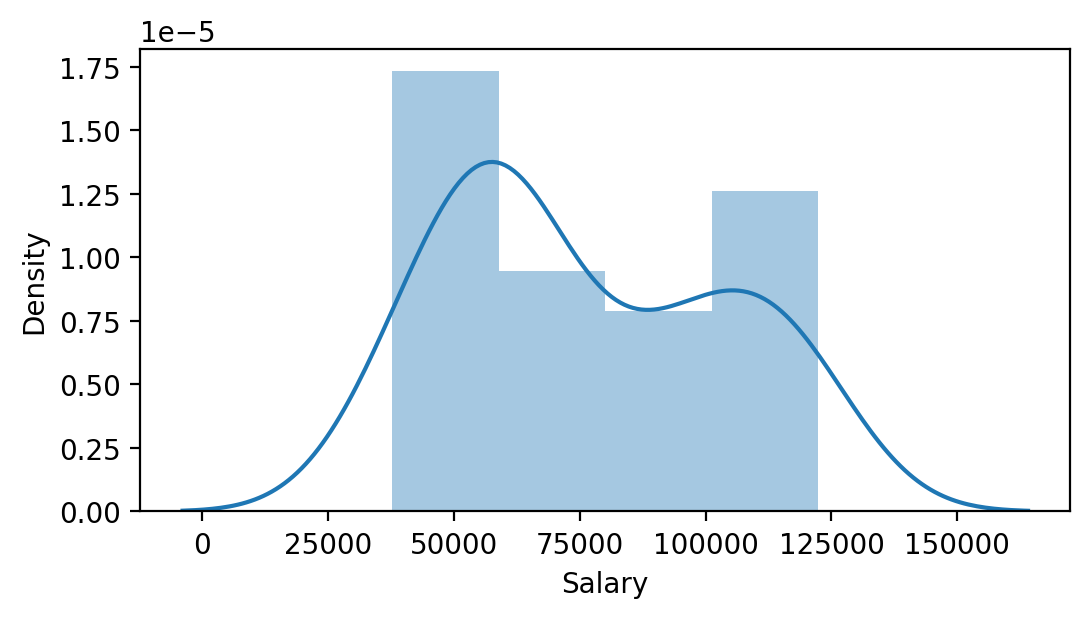

In [10]:
sns.distplot(df['Salary'])

In [11]:
# correlation Coefficient
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

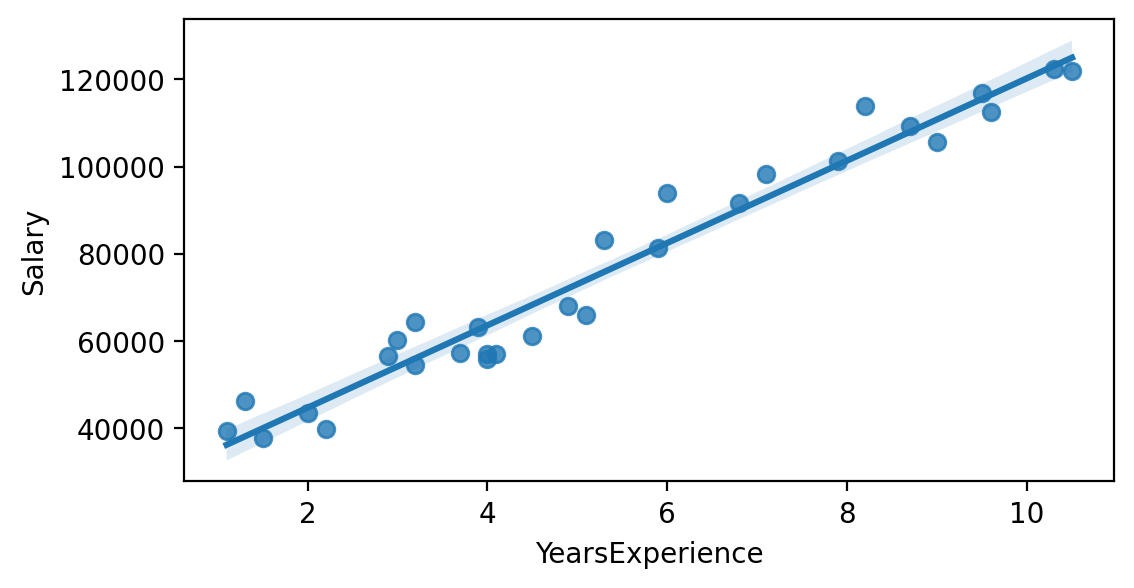

In [12]:
sns.regplot(x=df['YearsExperience'],y=df['Salary'])

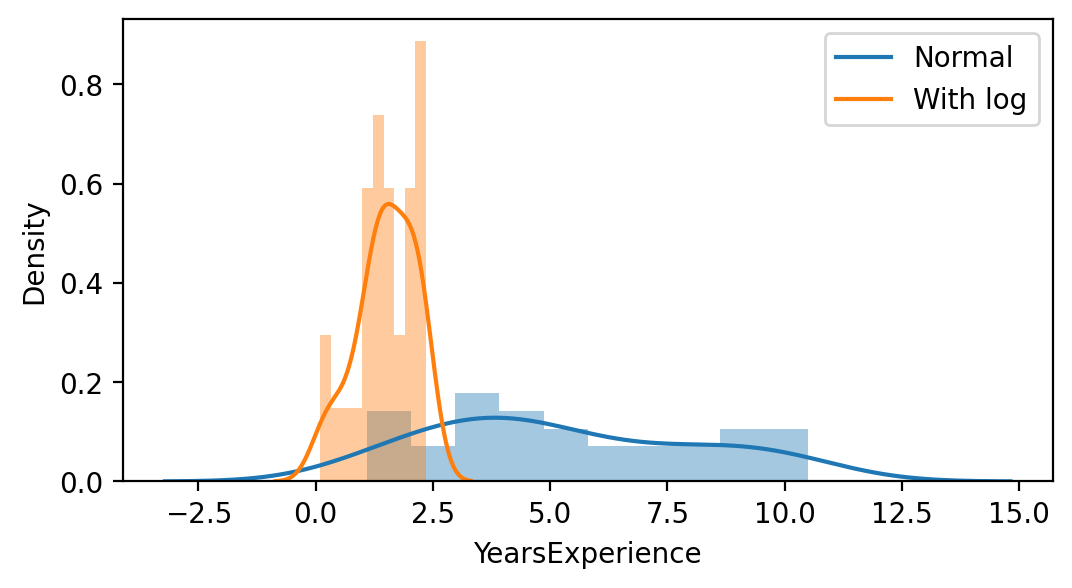

In [13]:
labels = ['Normal','With log']
sns.distplot(df['YearsExperience'], bins = 10)
sns.distplot(np.log(df['YearsExperience']), bins = 10)
plt.legend(labels)

In [14]:
import statsmodels.api as smf

Text(0.5, 1.0, 'Square root applied')

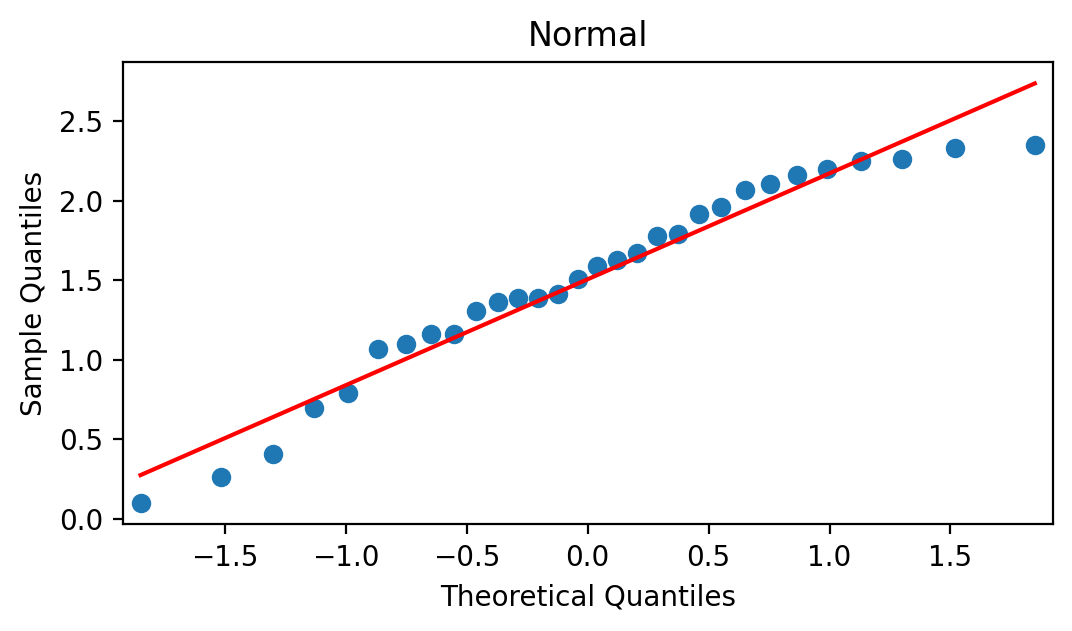

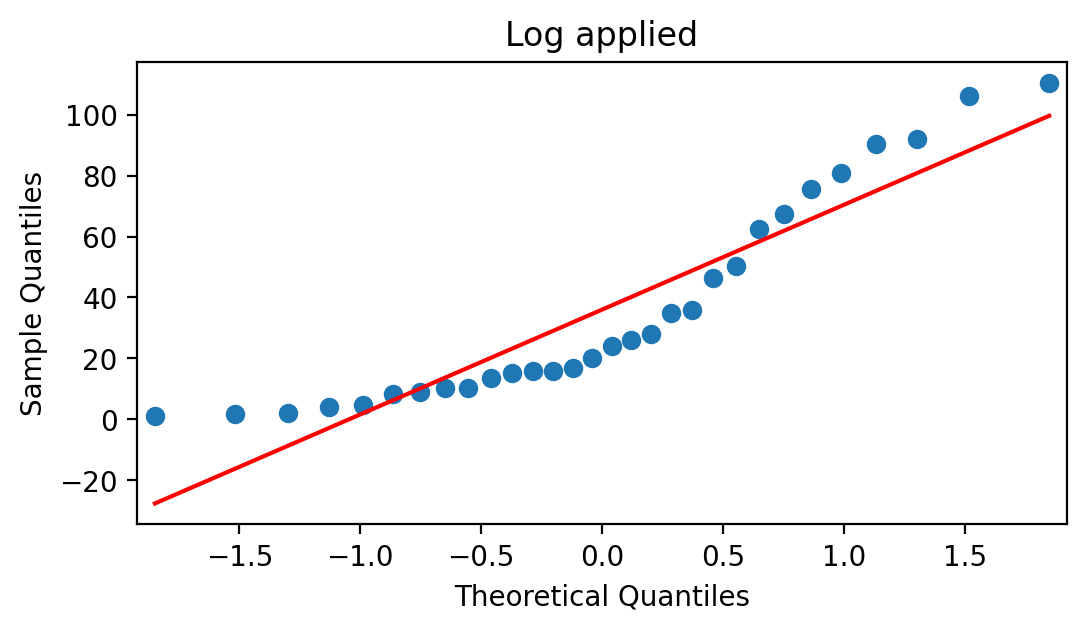

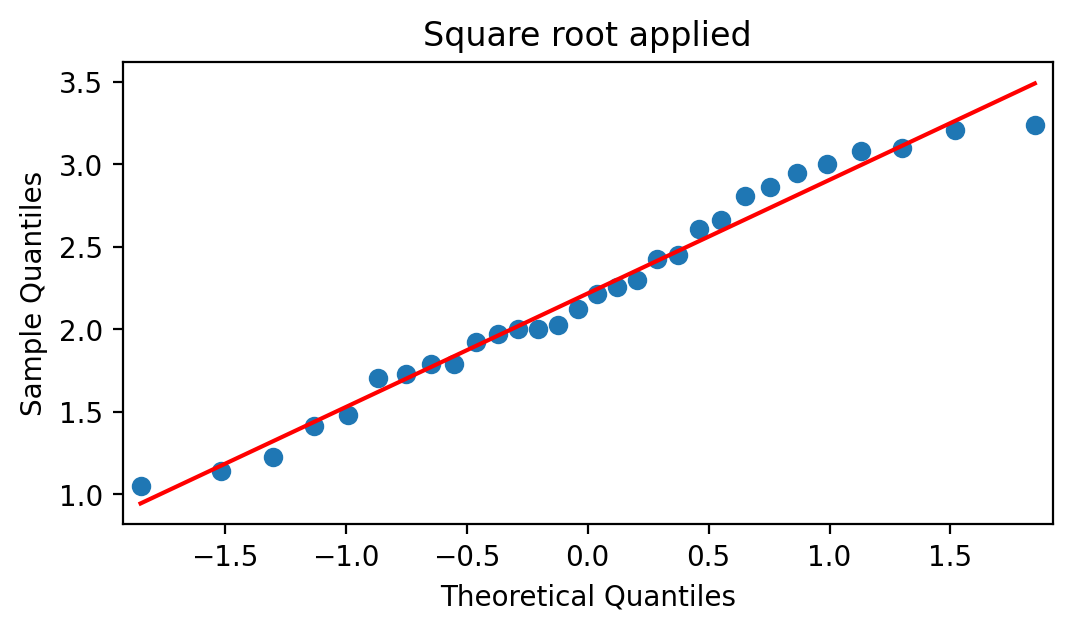

In [15]:
smf.qqplot(np.log(df['YearsExperience']), line ='r')
plt.title('Normal')
smf.qqplot(np.square(df['YearsExperience']), line ='r')
plt.title('Log applied')
smf.qqplot(np.sqrt(df['YearsExperience']), line ='r')
plt.title('Square root applied')

In [16]:
import statsmodels.formula.api as smf

In [17]:
model = smf.ols('Salary~YearsExperience',data = df).fit()
model

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           1.14e-20
Time:                        01:22:00   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
x = df.filter(['YearsExperience'])
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [20]:
y = df.filter(['Salary'])
y

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


In [21]:
x = df['YearsExperience'].values.reshape(-1,1)
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [22]:
y = df['Salary'].values.reshape(-1,1)
y

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.]])

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 44)

In [25]:
predict_reg = LinearRegression()

In [26]:
predict_reg.fit(x_train, y_train)

LinearRegression()

In [27]:
print('Intercept value of Model is ', predict_reg.intercept_)
print('Coefficient value of Model is ', predict_reg.coef_)

Intercept value of Model is  [27568.48377505]
Coefficient value of Model is  [[9113.59286377]]


In [28]:
y_pred = predict_reg.predict(x_test)

In [29]:
nw1 = pd.DataFrame({'Actual':y_test.flatten(), 'Predict':y_pred.flatten()})
nw1

,Actual,Predict
0,113812.0,102299.945258
1,98273.0,92274.993108
2,37731.0,41238.873071
3,109431.0,106856.741690
4,66029.0,74047.807380
5,55794.0,64022.855230


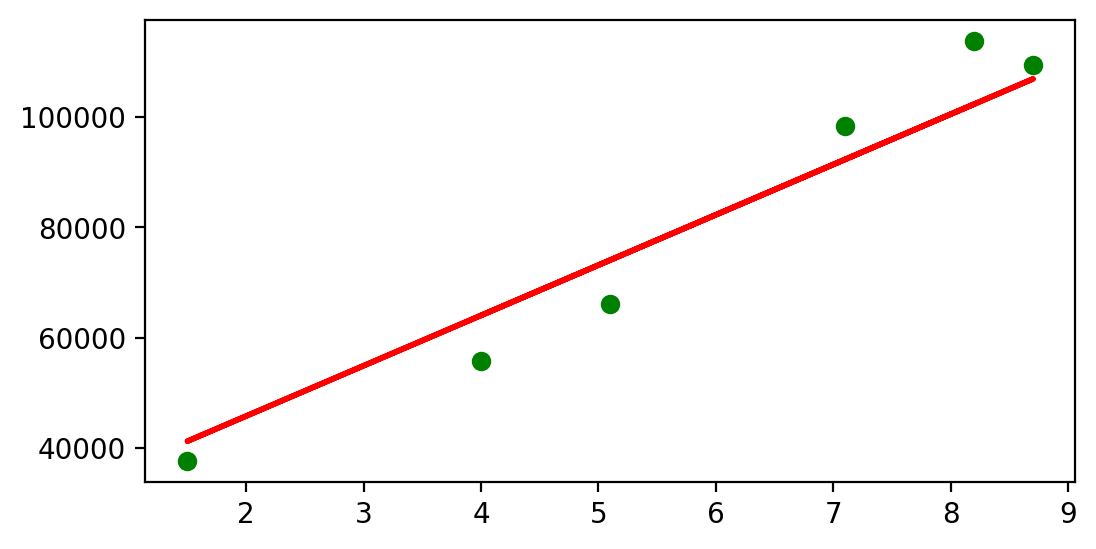

In [30]:
plt.scatter(x_test, y_test, color='g')
plt.plot(x_test, y_pred, color='r', linewidth=2)

In [31]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 6639.975937575189
Mean Squared Error: 53241800.098319896
Root Mean Squared Error: 7296.697890026686
R^2 Score: 0.934951117043928


# Log Transformation

In [32]:
x_log = np.log(df['YearsExperience'].values.reshape(-1,1))

In [33]:
y_log = df['Salary'].values.reshape(-1,1)

In [34]:
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(x_log, y_log, test_size=0.2, random_state= 44)

In [35]:
y_pred_log=LinearRegression()

In [36]:
y_pred_log.fit(x_train_log, y_train_log)

LinearRegression()

In [37]:
print('Intercept value of Model is', y_pred_log.intercept_)
print('Co-efficient value of Log Model :',y_pred_log.coef_)

Intercept value of Model is [16109.54881635]
Co-efficient value of Log Model : [[39784.74984518]]


In [38]:
linear_model=y_pred_log.predict(x_test_log)
linear_model

array([[ 99821.99978468],
       [ 94091.42947251],
       [ 32240.87671338],
       [102176.81422657],
       [ 80928.47612714],
       [ 71262.92318529]])

In [39]:
nw = pd.DataFrame({'Actual':y_test_log.flatten(), 'Predict': linear_model.flatten()})
nw

,Actual,Predict
0,113812.0,99821.999785
1,98273.0,94091.429473
2,37731.0,32240.876713
3,109431.0,102176.814227
4,66029.0,80928.476127
5,55794.0,71262.923185


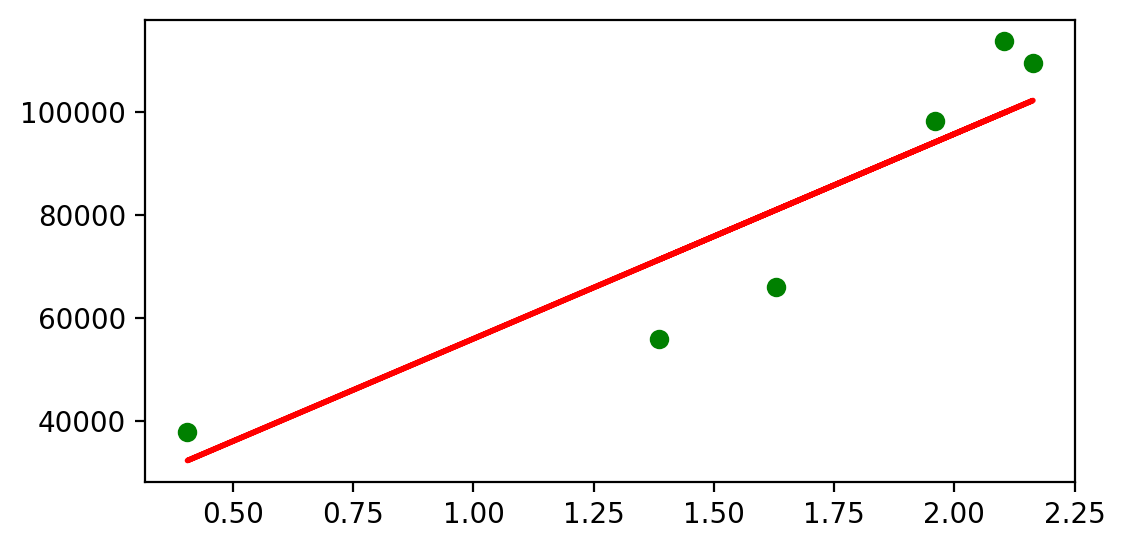

In [40]:
plt.scatter(x_test_log, y_test_log, color='g')
plt.plot(x_test_log, linear_model, color='r', linewidth=2)

In [41]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_log, linear_model))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_log, linear_model))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_log, linear_model)))
print('R^2 Score:',metrics.r2_score(y_test_log, linear_model))

Mean Absolute Error: 10214.046519214078
Mean Squared Error: 126208712.7357005
Root Mean Squared Error: 11234.26511774137
R^2 Score: 0.8458028134356755


In [42]:
model1 = smf.ols('np.sqrt(Salary)~(YearsExperience)', data = df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     530.2
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           9.78e-20
Time:                        01:22:12   Log-Likelihood:                -114.33
No. Observations:                  30   AIC:                             232.7
Df Residuals:                      28   BIC:                             235.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         180.7002      4.446     40.646      0.000     171.594     189.807
YearsExperience    17.0565      0.741     23.025      0.000      15.539      18.574
==============================================================================
Omnibus:                        2.621   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.906
Skew:                           0.439   Prob(JB):                        0.386
Kurtosis:                       2.131   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

# Exponential Transformation

In [44]:
x_e_log = df['YearsExperience'].values.reshape(-1,1)

In [45]:
y_e_log = np.log(df['Salary'].values.reshape(-1,1))

In [46]:
x_train_exp, x_test_exp, y_train_exp, y_test_exp = train_test_split(x_e_log, y_e_log, test_size=0.2, random_state=44)

In [47]:
exp_model= LinearRegression()
exp_model.fit(x_train_exp, y_train_exp)

LinearRegression()

In [48]:
print('Exponent Model Intercept value is', exp_model.intercept_)
print('Exponent Model Coefficient value is ', exp_model.coef_)

Exponent Model Intercept value is [10.54288836]
Exponent Model Coefficient value is  [[0.11925931]]


In [49]:
exp_model_pred=exp_model.predict(x_test_exp)
exp_model_pred

array([[11.52081466],
       [11.38962942],
       [10.72177731],
       [11.58044431],
       [11.15111081],
       [11.01992558]])

In [50]:
nw1 = pd.DataFrame({'Actual':y_test_exp.flatten(), 'Predict': exp_model_pred.flatten()})
nw1

,Actual,Predict
0,11.642303,11.520815
1,11.495505,11.389629
2,10.538237,10.721777
3,11.603049,11.580444
4,11.097849,11.151111
5,10.929422,11.019926


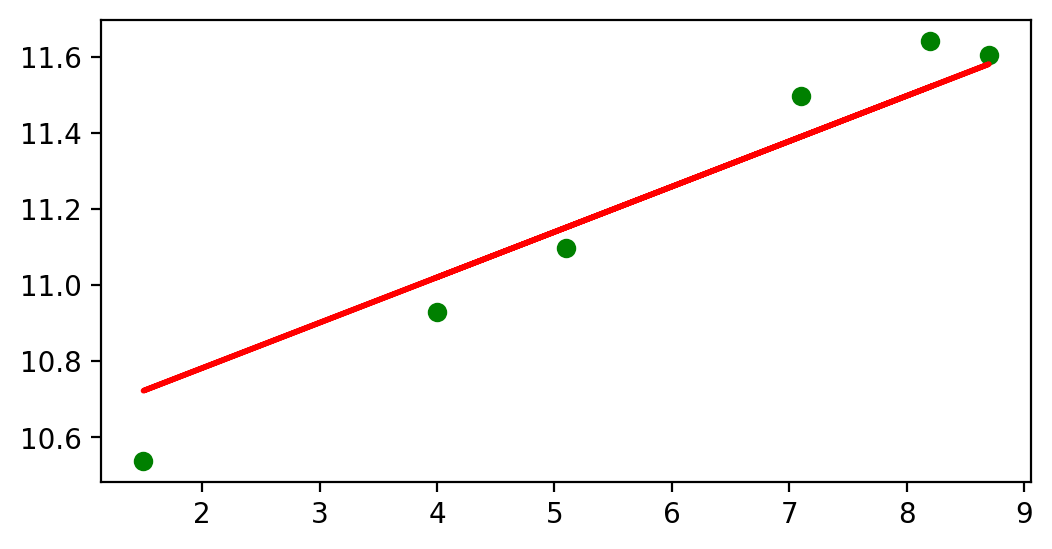

In [51]:
plt.scatter(x_test_exp, y_test_exp, color='g')
plt.plot(x_test_exp, exp_model_pred, color='r',linewidth=2)

In [52]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_exp, exp_model_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_exp, exp_model_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_exp, exp_model_pred)))
print('R^ Score:', metrics.r2_score(y_test_exp, exp_model_pred))

Mean Absolute Error: 0.09621239855649577
Mean Squared Error: 0.01186578451874791
Root Mean Squared Error: 0.10893018185401102
R^ Score: 0.9262304162490149


In [53]:
model2 = smf.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data = df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           7.58e-19
Time:                        01:22:17   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# as per the observed transformation expoenential model is the fit model.